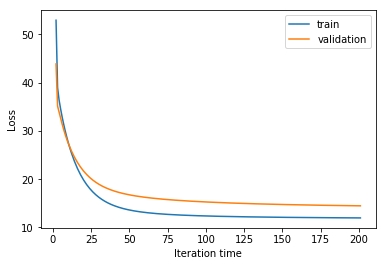

In [8]:
# write your code here
import numpy as np
from numpy import *
import sklearn 
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#read dataset
X,y = load_svmlight_file("Housing.txt")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

X_train = matrix(X_train.toarray())
X_test = matrix(X_test.toarray())

y_train = matrix(y_train).T
y_test = matrix(y_test).T


#parameters
nita = 0.0005

w = mat(zeros((X_train.shape[1],1)))

#loss and gradient function
def loss(X,y,w):
    return (y-X*w).T*(y-X*w)/2

def grad(X,y,w):
    return -X.T*y+X.T*X*w

#if the matrix has only one element,get it as a number
def ele(t):
    return np.array(t)[0]

iter_cnt = 1
iter_time = 200

train_x = []
train_y = []

test_x = []
test_y = []

#gradient descent
while iter_cnt <= iter_time:
    iter_cnt += 1
    w -= nita*grad(X_train,y_train,w)
    
    train_x.append(iter_cnt)
    train_y.append(ele(loss(X_train,y_train,w))/y_train.shape[0])
    test_x.append(iter_cnt)
    test_y.append(ele(loss(X_test,y_test,w))/y_test.shape[0])

#plot
plt.plot(train_x,train_y,label = "train")
plt.plot(test_x,test_y,label = "validation")
plt.legend(loc = 'upper right')

plt.xlabel("Iteration time")
plt.ylabel("Loss")

plt.show()
